In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
!ls sample_data


AEP_hourly.csv		      DAYTON_hourly.csv  est_hourly.paruqet	PJME_hourly.csv
anscombe.json		      DEOK_hourly.csv	 FE_hourly.csv		pjm_hourly_est.csv
california_housing_test.csv   DOM_hourly.csv	 mnist_test.csv		PJM_Load_hourly.csv
california_housing_train.csv  DUQ_hourly.csv	 mnist_train_small.csv	PJMW_hourly.csv
COMED_hourly.csv	      EKPC_hourly.csv	 NI_hourly.csv		README.md


In [3]:
import pandas as pd
df = pd.read_csv('sample_data/PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head(10)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
2002-12-31 06:00:00,26222.0
2002-12-31 07:00:00,28702.0
2002-12-31 08:00:00,30698.0
2002-12-31 09:00:00,31800.0


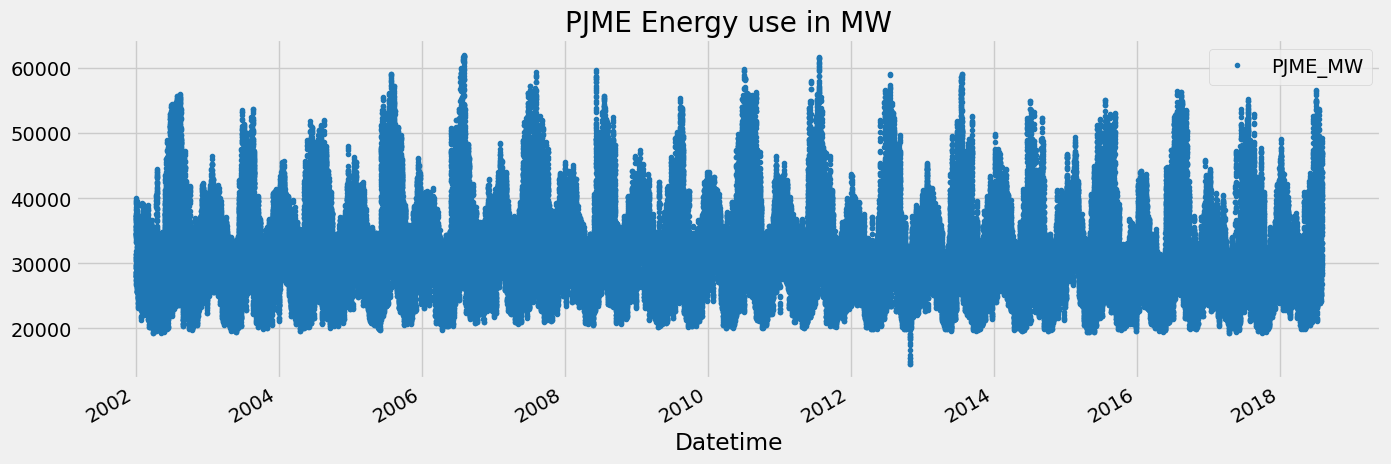

In [4]:
df.plot(style='.',figsize=(15,5),color=color_pal[0],title="PJME Energy use in MW")
plt.show()

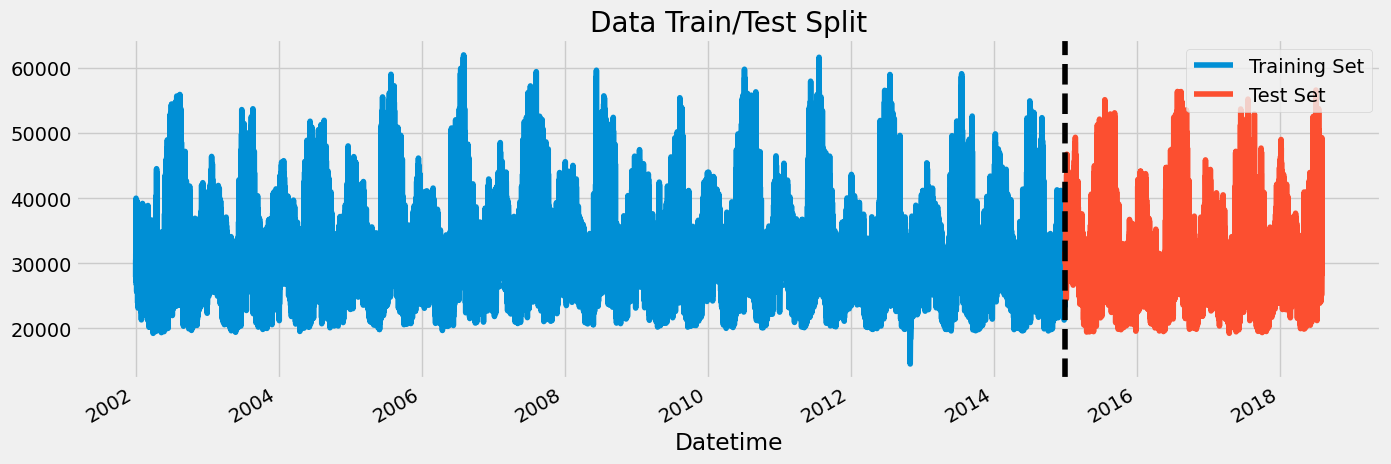

In [5]:
#spliting
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [6]:
#FEAtURE CREATION
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df
df = create_features(df)
df.head(10)

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,31,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,31,1
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,31,1
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,31,1
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,31,1
2002-12-31 06:00:00,26222.0,6,1,4,12,2002,365,31,1
2002-12-31 07:00:00,28702.0,7,1,4,12,2002,365,31,1
2002-12-31 08:00:00,30698.0,8,1,4,12,2002,365,31,1
2002-12-31 09:00:00,31800.0,9,1,4,12,2002,365,31,1


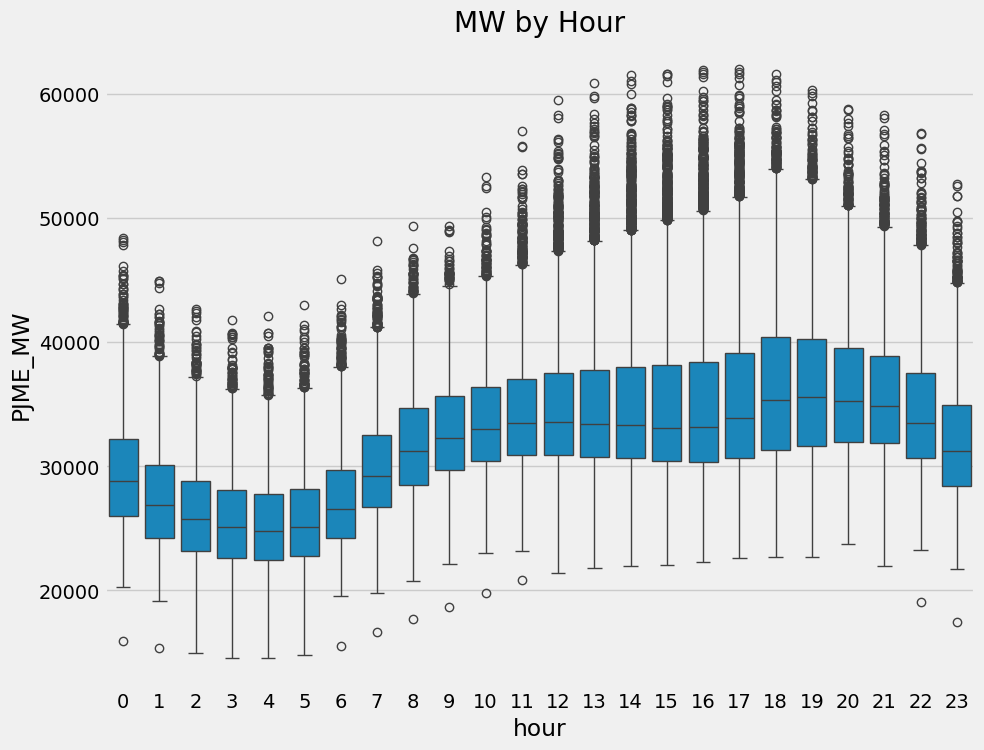

In [7]:
#Visualize our Feature / Target Relationship
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

<ipython-input-8-69cf918e87c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')


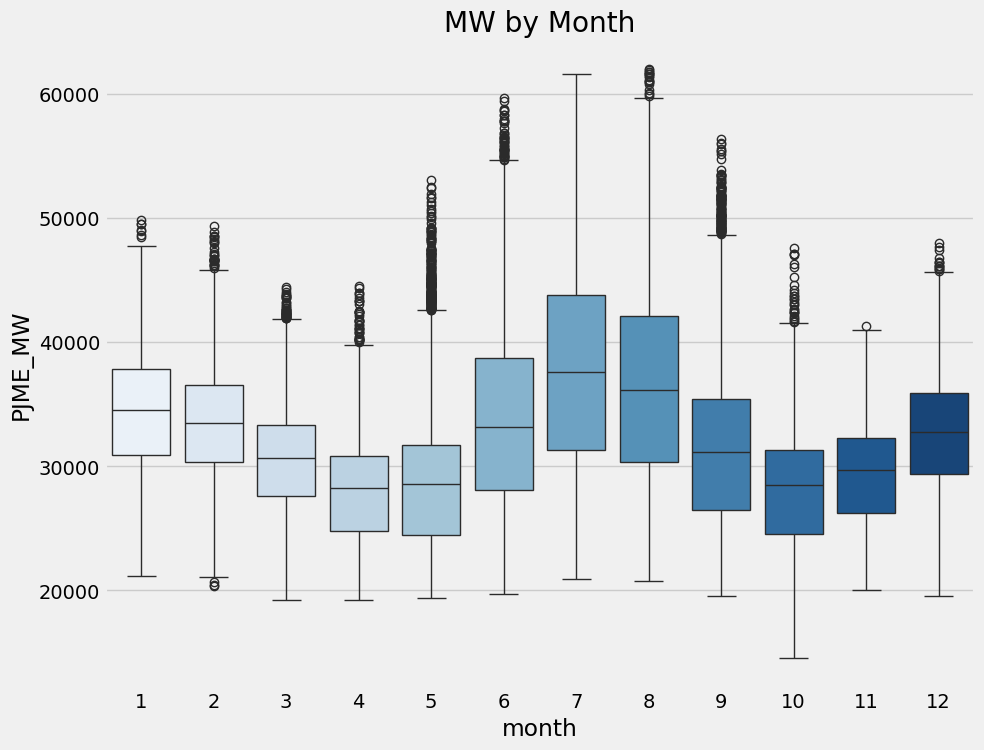

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW by Month')
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [10]:
train=create_features(train)
test=create_features(test)

In [11]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

In [12]:
features = ['hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear']
target = 'PJME_MW'

In [13]:
X_train=train[features]
y_train=train[target]
X_test=test[features]
y_test=test[target]

In [17]:
pip install --upgrade scikit-learn xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.2
    Uninstalling xgboost-1.6.2:
      Successfully uninstalled xgboost-1.6.2


In [18]:
import xgboost as xgb
import sklearn

print(xgb.__version__)
print(sklearn.__version__)


1.6.2
1.6.0


In [21]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train, X_test, y_train, y_test are defined
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,learning_rate=0.001)
reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100
)


/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


[0]	validation_0-rmse:32894.63731	validation_1-rmse:31946.77347


/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


[100]	validation_0-rmse:29802.40433	validation_1-rmse:28850.26820
[200]	validation_0-rmse:27007.68143	validation_1-rmse:26052.45286
[300]	validation_0-rmse:24482.32296	validation_1-rmse:23533.95989
[400]	validation_0-rmse:22201.28723	validation_1-rmse:21261.67176
[500]	validation_0-rmse:20141.58252	validation_1-rmse:19211.95514
[600]	validation_0-rmse:18281.67864	validation_1-rmse:17372.91432
[700]	validation_0-rmse:16603.52794	validation_1-rmse:15717.88119
[800]	validation_0-rmse:15090.23962	validation_1-rmse:14218.24413
[900]	validation_0-rmse:13726.70899	validation_1-rmse:12873.09950
[999]	validation_0-rmse:12510.66065	validation_1-rmse:11683.12247


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

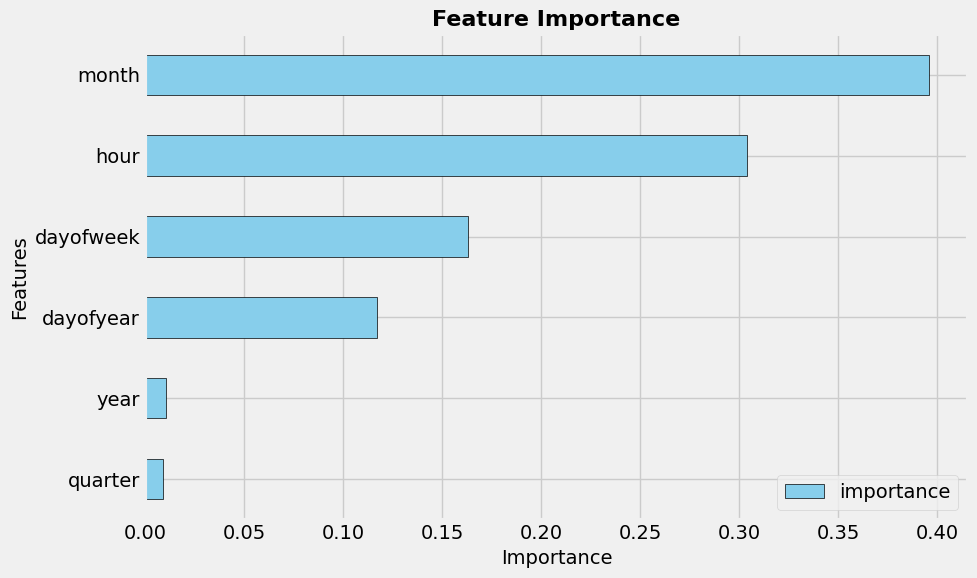

In [22]:
#FEAture IMPORTANCCE
fi = pd.DataFrame(data=reg.feature_importances_,
                  index=reg.feature_names_in_,
                  columns=['importance'])

fi_sorted = fi.sort_values('importance')
fi_sorted.plot(kind='barh', title='Feature Importance', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

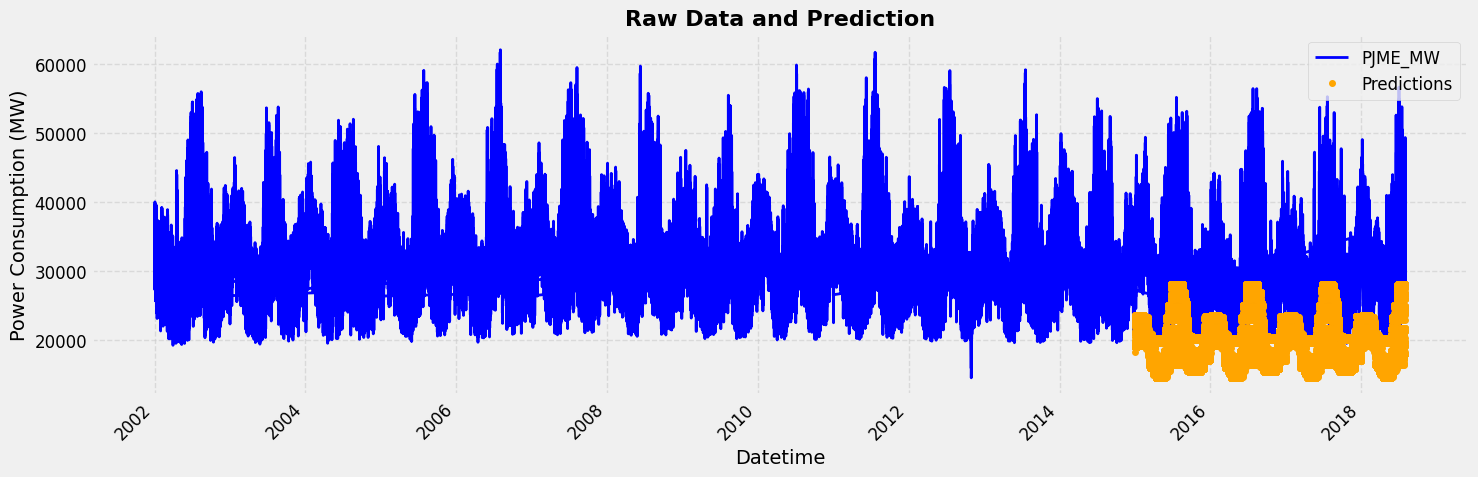

In [24]:
#prediction
test['prediction_new'] = reg.predict(X_test)

df = df.merge(test[['prediction_new']], how='left', left_index=True, right_index=True, suffixes=('', '_new'))

fig, ax = plt.subplots(figsize=(15, 5))
df[['PJME_MW']].plot(ax=ax, color='blue', linewidth=2, label='Truth Data')
df['prediction_new'].plot(ax=ax, style='.', color='orange', markersize=8, label='Predictions')
ax.set_title('Raw Data and Prediction', fontsize=16, fontweight='bold')
ax.set_xlabel('Datetime', fontsize=14)
ax.set_ylabel('Power Consumption (MW)', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

RMSE Score on Test set: 11683.12


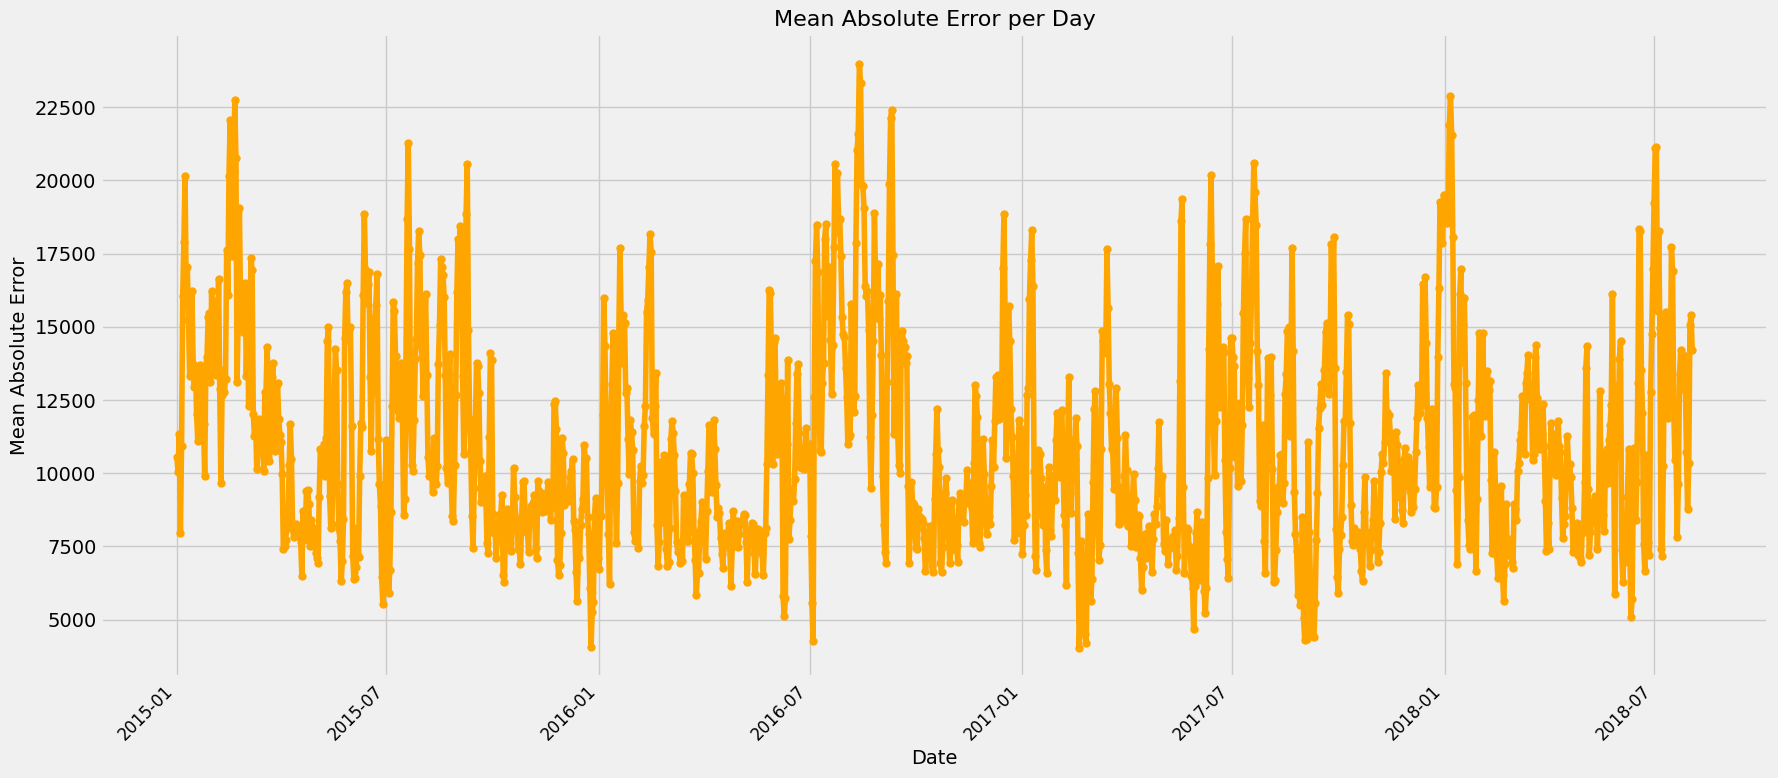

date
2016-08-13    23994.513021
2016-08-14    23319.643636
2018-01-06    22894.469076
2015-02-20    22736.354004
2016-09-10    22422.469279
2016-09-09    22129.154500
2015-02-16    22058.791992
2018-01-05    21897.454102
2016-08-12    21600.026204
2018-01-07    21568.677246
Name: error, dtype: float64


In [28]:
#score-rmse(plot also)
score = np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction_new']))
print(f'RMSE Score on Test set: {score:0.2f}')

test['error'] = np.abs(test['PJME_MW'] - test['prediction_new'])

test['date'] = test.index.date

mean_error_per_day = test.groupby(['date'])['error'].mean()
plt.figure(figsize=(18, 8))
plt.plot(mean_error_per_day.index, mean_error_per_day.values, marker='o', color='orange', linestyle='-', markersize=5)
plt.title('Mean Absolute Error per Day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Absolute Error', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()
print(mean_error_per_day.sort_values(ascending=False).head(10))

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next Steps
- More robust cross validation
- add more features ( weather, holiday)